In [2]:
import matplotlib.pyplot as plt # 引入module
import numpy as np
import pandas as pd

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

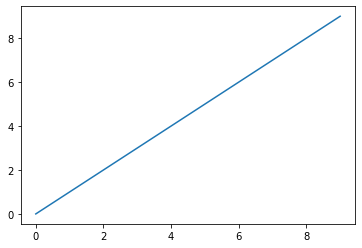

In [4]:
plt.plot(data)

#### （Figure和Subplot）

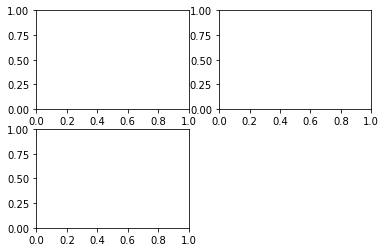

In [5]:
fig = plt.figure() # 创建一个figure
# 用add_subplot创建一个或多个subplot
ax1 = fig.add_subplot(2, 2, 1) # 2x2，四张图的第一张
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

对于复杂的图形，必须将所有的绘图命令存在一个小窗里

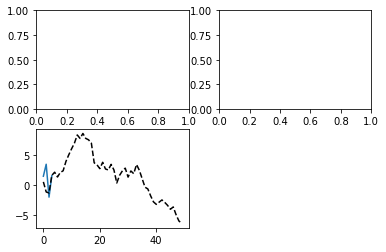

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])
plt.plot(np.random.randn(50).cumsum(), 'k--') #默认呈现在最后一张图

In [7]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

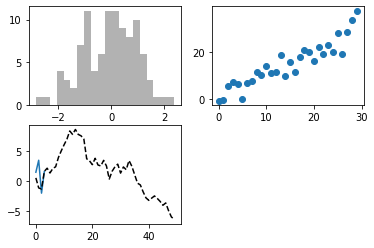

In [8]:
fig

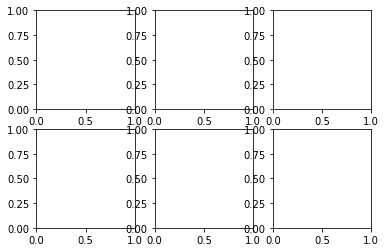

In [9]:
fig, axes = plt.subplots(2, 3) 
# 创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

In [10]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B67ED6188>,
      dtype=object)

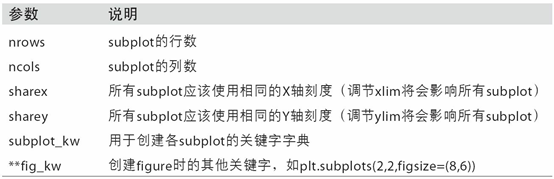

#### （调整subplot周围的间距）

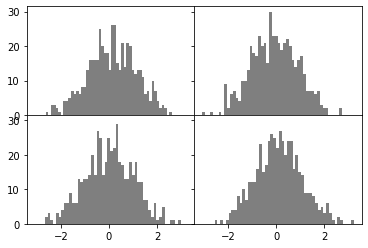

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

#### （颜色、标记和线型）

In [12]:
from numpy.random import randn

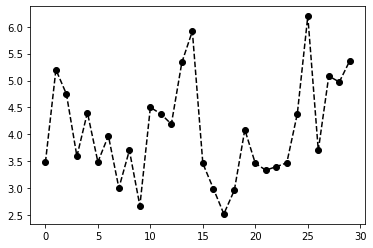

In [13]:
plt.plot(randn(30).cumsum(), 'ko--') # 标记类型和线型必须放在颜色后面

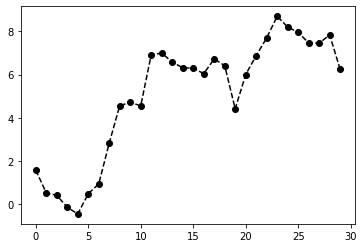

In [14]:
# 更为明确的形式
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [15]:
# 通过drawstyle选项修改线型
data =randn(30).cumsum()

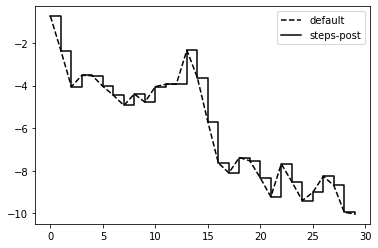

In [16]:
plt.plot(data, 'k--', label = 'default')
plt.plot(data, 'k-', drawstyle='steps-post', label = 'steps-post')
plt.legend(loc='best')

#### (设置标题、轴标签、刻度以及刻度标签)

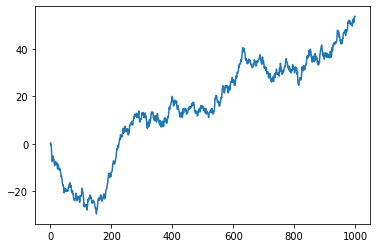

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [18]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # 将刻度放在数据范围中的哪些位置

In [19]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                            rotation=30, 
                            fontsize = 'small') # 将任何其他的值用作标签

In [20]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1, 'My first matplotlib plot')

In [21]:
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

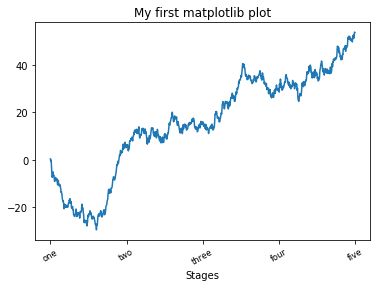

In [22]:
fig

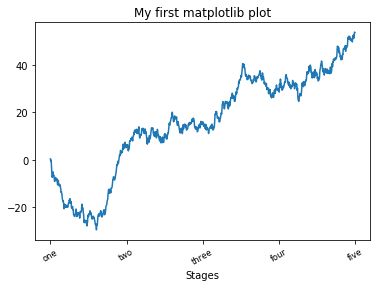

In [23]:
props = {
    'title': 'My first matplotlib plot',
     'xlabel': 'Stages'
}
ax.set(**props)
fig

#### Adding legends（加入图例）

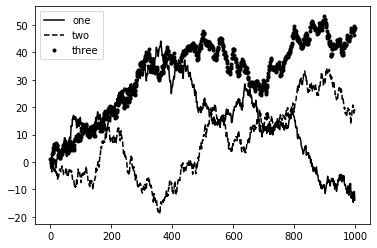

In [24]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label = 'three')
ax.legend(loc = 'best') # 自动创建图例

#### Annotations and Drawing on a Subplot（注解以及在Subplot上绘图）

绘制一些子集的注解:

In [25]:
from datetime import datetime

注解中可以既含有文本也含有箭头。例如，我们根据最近的标准普尔500指数价格（来自Yahoo!Finance）绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

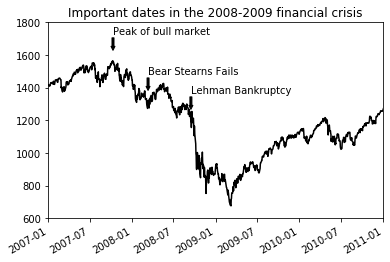

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('Course_Material/examples/spx.csv', 
                   index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy'),
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

ax.annotate方法可以在指定的x和y坐标轴绘制标签, set_xlim和set_ylim人工设定起始和结束边界，ax.set_title添加图标标题

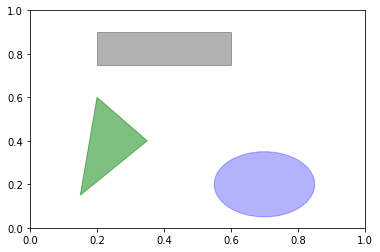

In [27]:
# 绘制图片：创建一个patch（块）对象shp，然后通过ax.add_patch(shp)将其添加到subplot中
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### Saving Plots to File（将图片保存到文件）

In [28]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [29]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight') #添加参数

<Figure size 432x288 with 0 Axes>

In [30]:
# savefig写入任何文件型
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

figure.savefig的选项

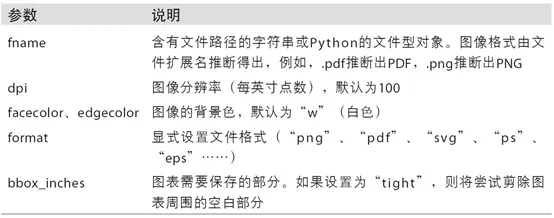

#### matplotlib Configuration （matplotlib配置）

In [31]:
plt.rc('figure', figsize=(10, 10)) # Python编程方式使用rc方法配置系统

In [32]:
font_options = {'family' : 'monospace',
 'weight' : 'bold',
 'size' : '11'} #原著中字号设置'small'出现报错，valuerrror，更换全部为数字的str后正常
plt.rc('font', **font_options)

### 9.2 Plotting with pandas and seaborn（使用pandas和seaborn绘图）

#### Line Plots（线性图）

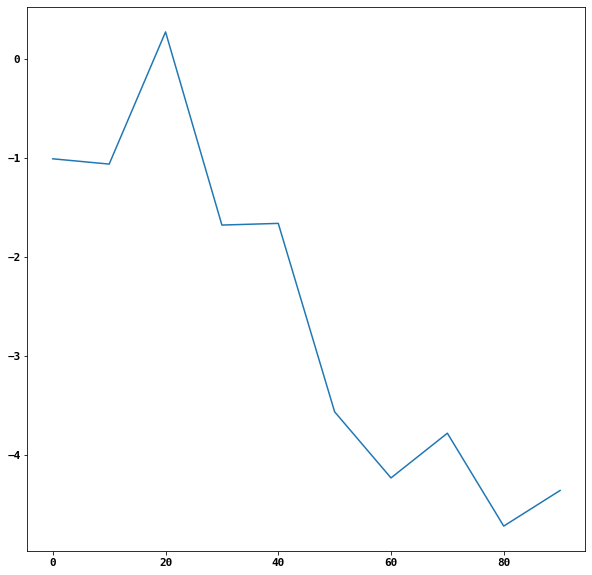

In [33]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
# Series和DataFrame生成图片的方法
s.plot()

plot参数列表

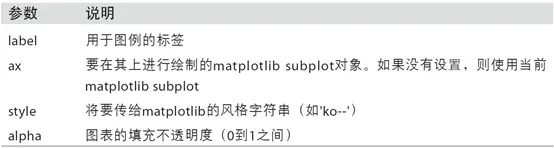

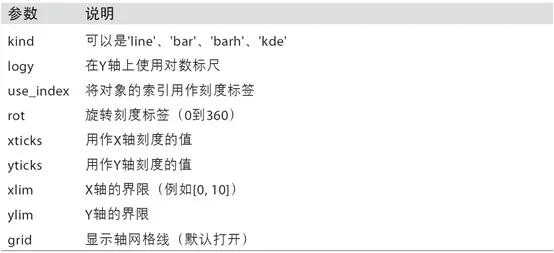

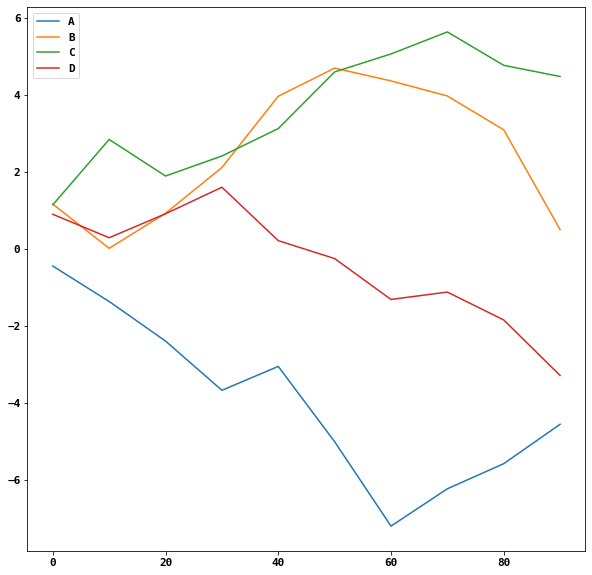

In [34]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns = ['A', 'B', 'C', 'D'],
                 index = np.arange(0, 100, 10))

df.plot()

DataFrame的plot参数

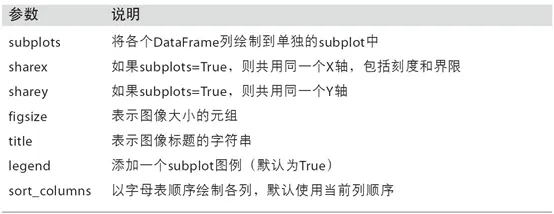

#### Bar Plots（柱状图）

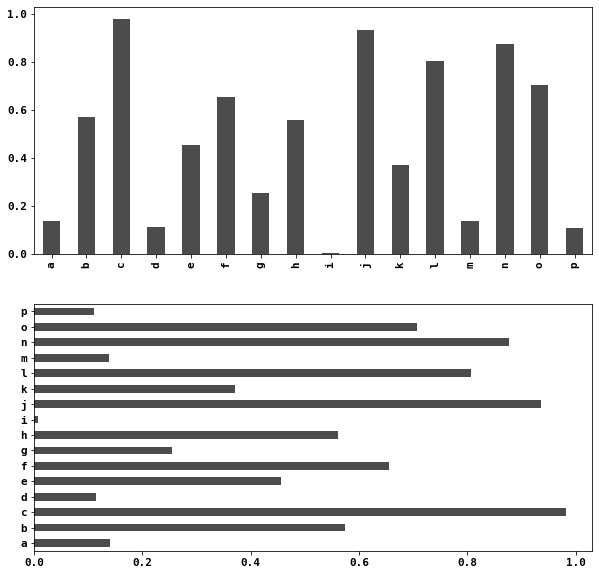

In [35]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7) #黑色，使用0.7透明度
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [36]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))

In [37]:
df

Genus,A,B,C,D
one,0.258081,0.569095,0.698624,0.728747
two,0.943703,0.157304,0.357575,0.737295
three,0.269526,0.490965,0.151982,0.254834
four,0.924115,0.348284,0.987423,0.990718
five,0.785029,0.140651,0.518560,0.430541
six,0.341562,0.160303,0.854678,0.502209


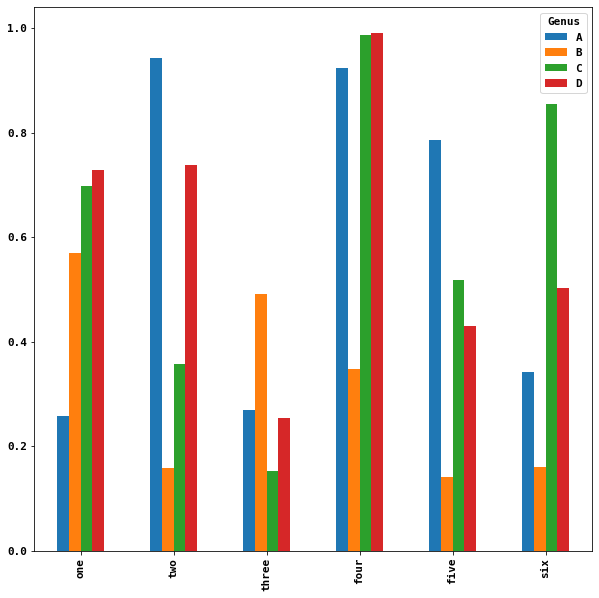

In [38]:
df.plot.bar() # 柱状图会将每一行的值分为一组，并排显示，名称被用作图例的标题

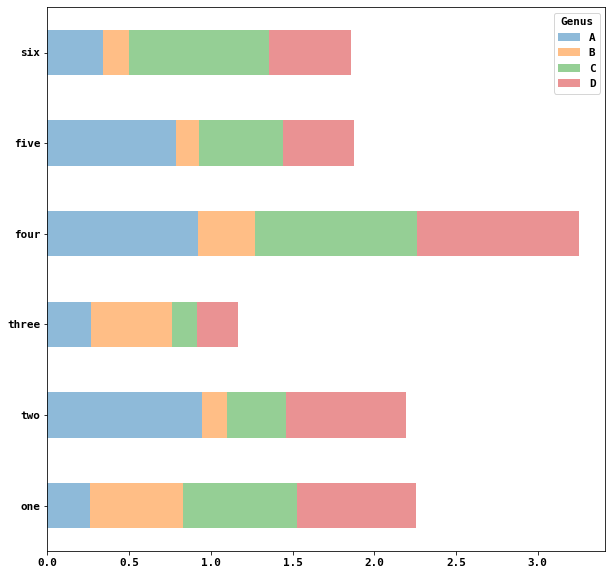

In [39]:
df.plot.barh(stacked=True, alpha=0.5) #生成柱状堆积图

可以利用value_counts图形化显示Series中各值的出现频率，比如df.value_counts().plot.bar()

In [40]:
#做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比
tips = pd.read_csv('Course_Material/examples/tips.csv') #加载数据
party_counts = pd.crosstab(tips['day'], tips['size'])

In [41]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [42]:
# 给1磅和6磅的人比较少
party_counts = party_counts.loc[:, 2:5]

In [43]:
party_pcts = party_counts.div(party_counts.sum(1),axis=0) # 规格化，使得各行的和为1

In [44]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


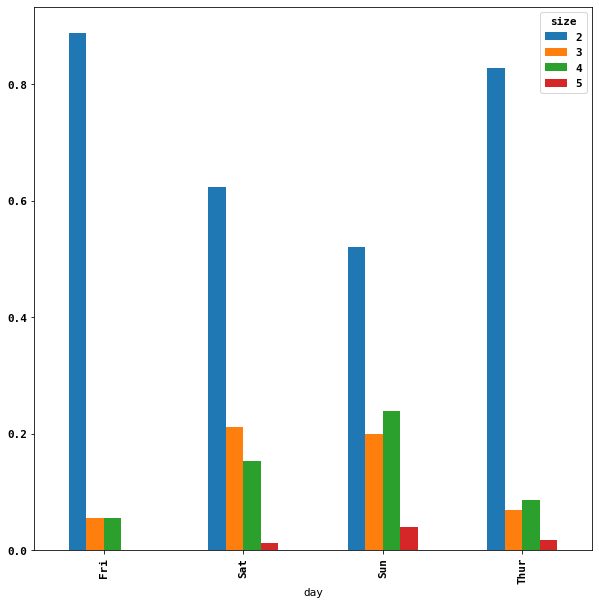

In [45]:
party_pcts.plot.bar()

通过该数据集就可以看出，聚会规模在周末会变大。

In [46]:
# 使用seaborn可以减少工作量
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


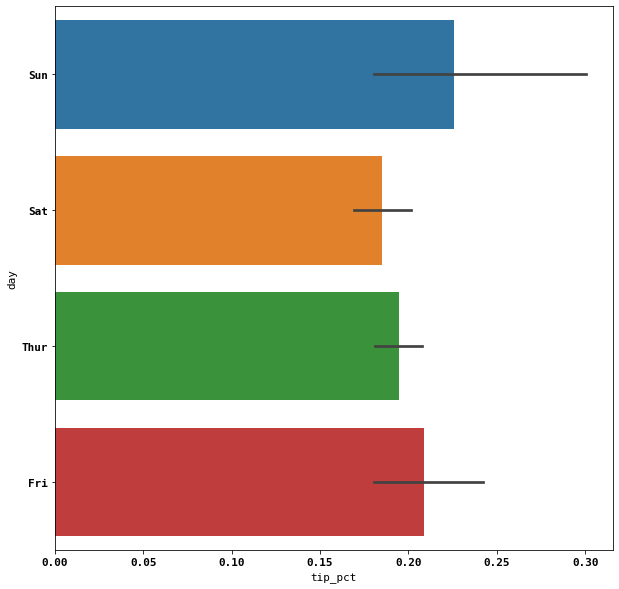

In [47]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

 seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

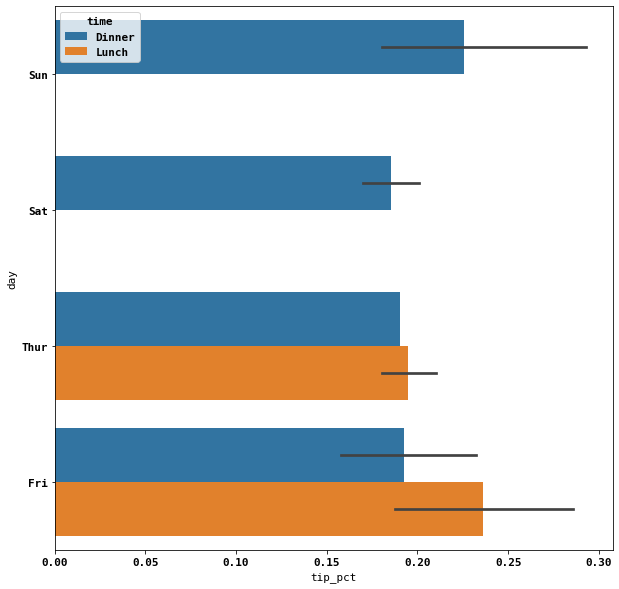

In [48]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#### Histograms and Density Plots（直方图和密度图）

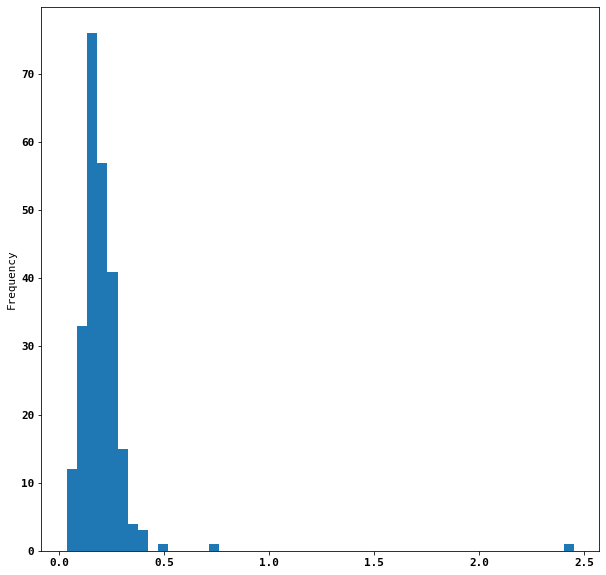

In [49]:
tips['tip_pct'].plot.hist(bins=50)

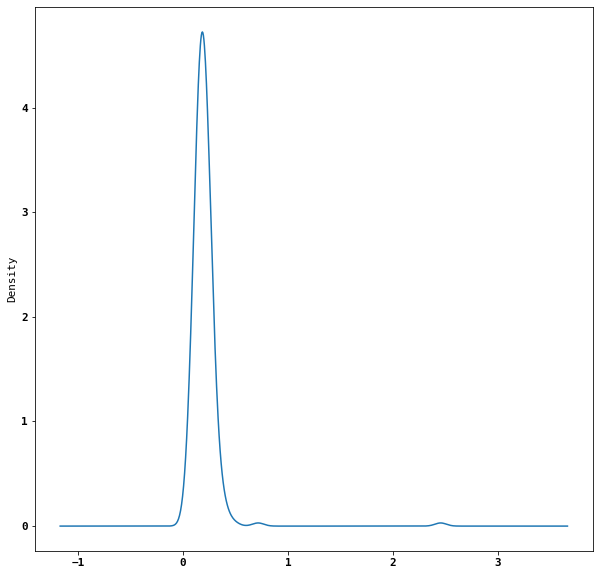

In [50]:
tips['tip_pct'].plot.density()

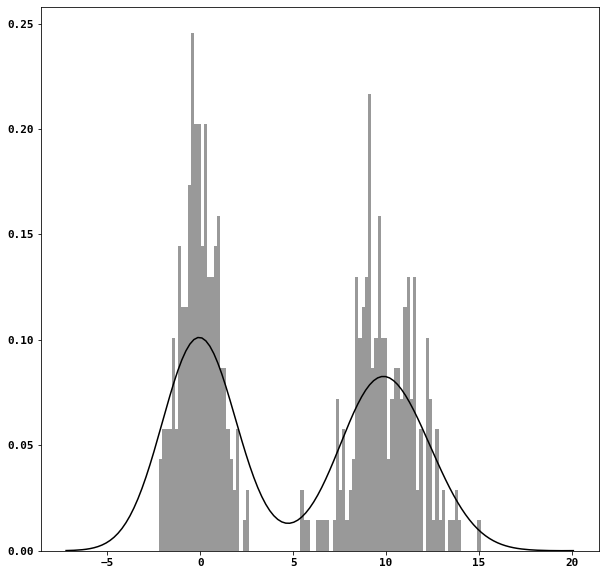

In [51]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

#### Scatter or Point Plots (散布图或点图)

In [52]:
macro = pd.read_csv('Course_Material/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

In [53]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

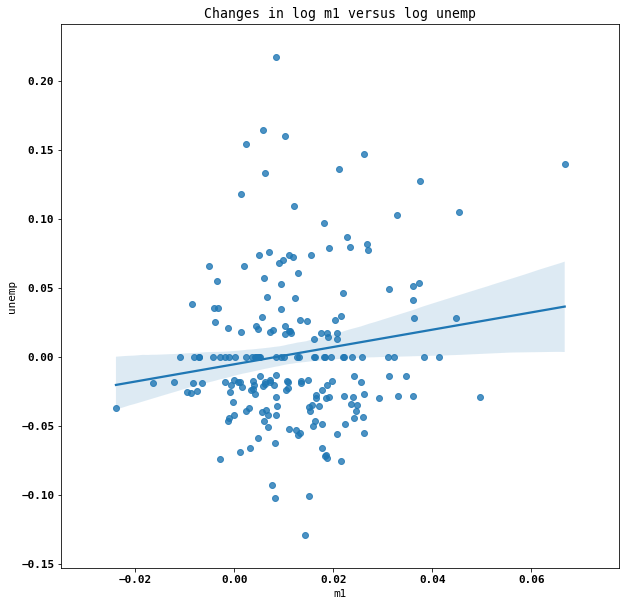

In [54]:
# 使用seaborn的regplot方法，做一个散布图，并加上一条线性回归的线
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

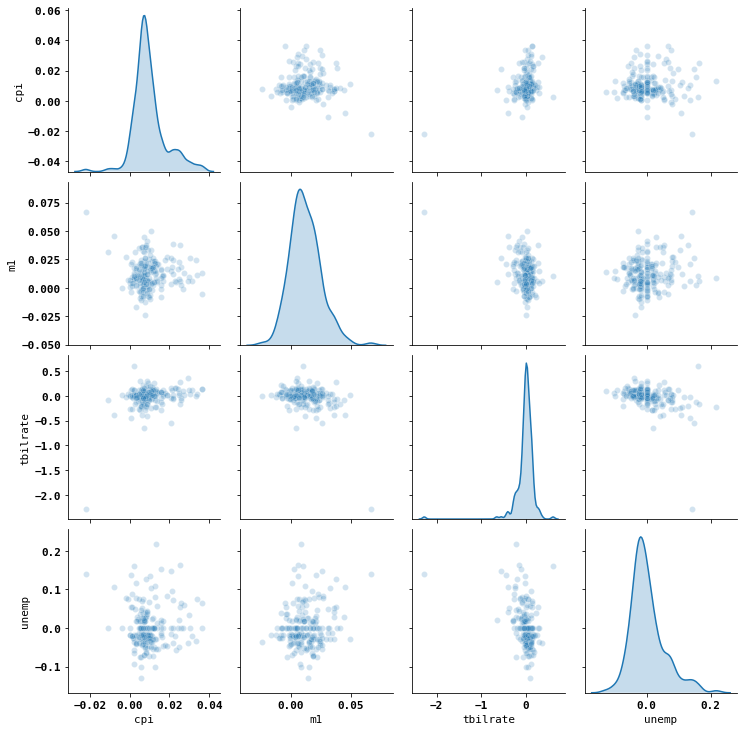

In [55]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


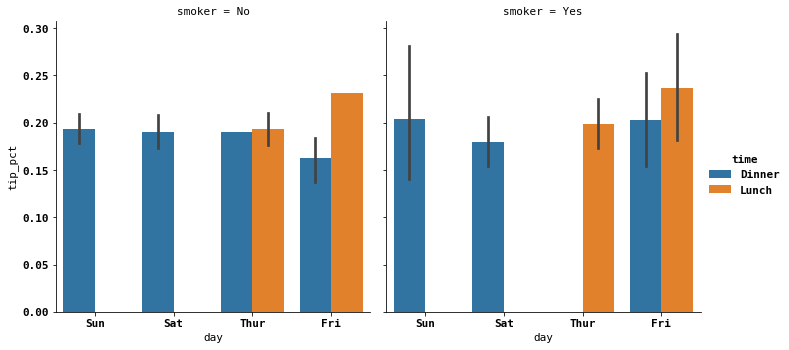

In [57]:
# seaborn的内置函数factorplot简化制作多种分面图
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', 
               data=tips[tips.tip_pct < 1])

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


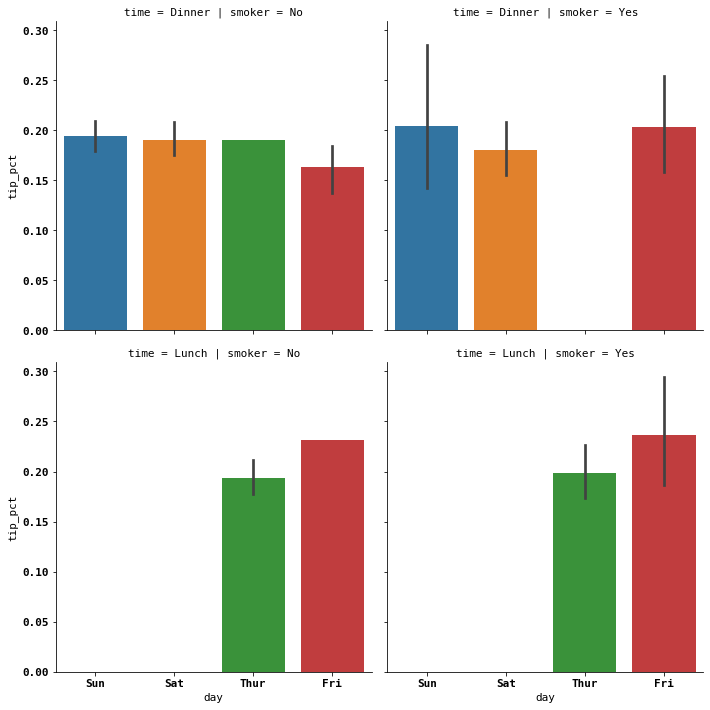

In [59]:
# 通过给每个时间值添加一行来扩展分面网格：
sns.factorplot(x='day', y='tip_pct', row='time',
              col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


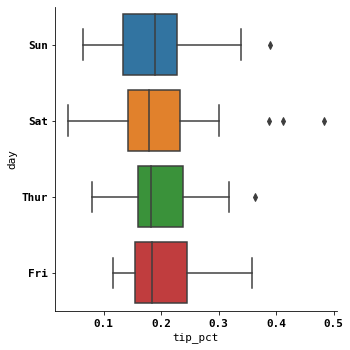

In [61]:
# 其它的绘图类型
sns.factorplot(x='tip_pct', y='day', kind='box',
                data=tips[tips.tip_pct < 0.5])